In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [140]:
# emiss_lim_list = 100.0 * np.array([1.0, 2.5, 5, 10, 15, 20, 25])
# emiss_lim_list= np.array([2.5 * 100.0])
emiss_lim_list = [""]

In [141]:
result_dir = Path.cwd().joinpath('Results')
result_dir.is_dir()

True

In [142]:
plots_dir = result_dir.joinpath('Plots')
Path.mkdir(plots_dir, exist_ok=True)

In [143]:
result_files_root = f"Primal_Baseline_noEmissLim"

In [144]:
def get_resource_types(df):
    # For each row in df, look at the "Resource" entry
    # and remove the number after the last underscore
    # to find the tech type.
    # Add the column of tech types to the df.
    tech_types = []
    for row in df.itertuples():
        tech_type = '_'.join(row.Resource.split('_')[:-1])
        tech_types.append(tech_type)
    df['ResourceType'] = tech_types
    return df


In [145]:
def get_resource_names(df, resource_names):
    tech_names = []
    for row in df.itertuples(): 
        tech_name = resource_names[row.ResourceType]
        tech_names.append(tech_name)
    df['ResourceName'] = tech_names
    return df


In [146]:
def get_zone_names(df, zone_names):
    zone_names_list = []
    for row in df.itertuples():
        zone_name = zone_names[row.Zone]
        zone_names_list.append(zone_name)
    df['ZoneName'] = zone_names_list
    return df

In [147]:
resource_names = {
    'res_hydro': 'Reservoir Hydro',
    'natural_gas': 'Natural Gas CombCycle',
    'natural_gas_ccs': 'Nat Gas CombCycle + CCS',
    'solar_pv': 'Solar PV',
    'battery': '4hr Li-ion',
    'offshore_wind': 'Offshore Wind',
    'onshore_wind': 'Onshore Wind',
    'ror_hydro': 'Run of River Hydro',
    'pumped_hydro': 'Pumped Hydro',
    'nuclear': 'Fission',
    'fusion': 'Fusion'
}

zone_names = {
    1.0: 'QC',
    2.0: 'ME',
    3.0: 'NH',
    4.0: 'VT',
    5.0: 'MA',
    6.0: 'RI',
    7.0: 'CT'    
}


In [148]:
result_df = {}
for emiss_lim in emiss_lim_list:
    result_df[emiss_lim] = {}

In [149]:
for emiss_lim in emiss_lim_list:
    result_files = result_dir.joinpath(f"{result_files_root}{emiss_lim}")

    df_capacity = pd.read_csv(result_files.joinpath("capacity.csv"))
    # Set any values below 0.1 to 0
    df_capacity.loc[df_capacity.EndCap <= 0.1, "EndCap"] = 0.0
    # Drop total in last row
    df_capacity = df_capacity.drop(df_capacity.index[-1])
    # Get tech types and add to DataFrame
    df_capacity = get_resource_types(df_capacity)
    df_capacity = get_resource_names(df_capacity, resource_names)
    df_capacity = get_zone_names(df_capacity, zone_names)

    # Make a new DataFrame with only the EndCa[] values, indexed by Zone and ResourceName, indexed by Zone
    df_capacity_by_zone = df_capacity.pivot(index='ZoneName', columns='ResourceName', values='EndCap')    
    df_capacity_by_zone = df_capacity_by_zone.fillna(0.0)

    result_df[emiss_lim]['capacity'] = df_capacity
    result_df[emiss_lim]['capacity_by_zone'] = df_capacity_by_zone

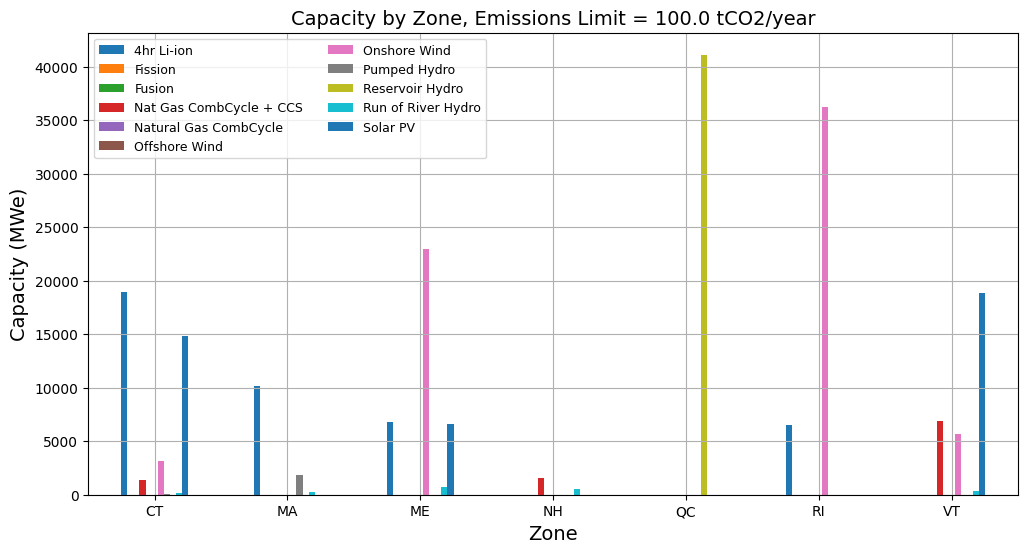

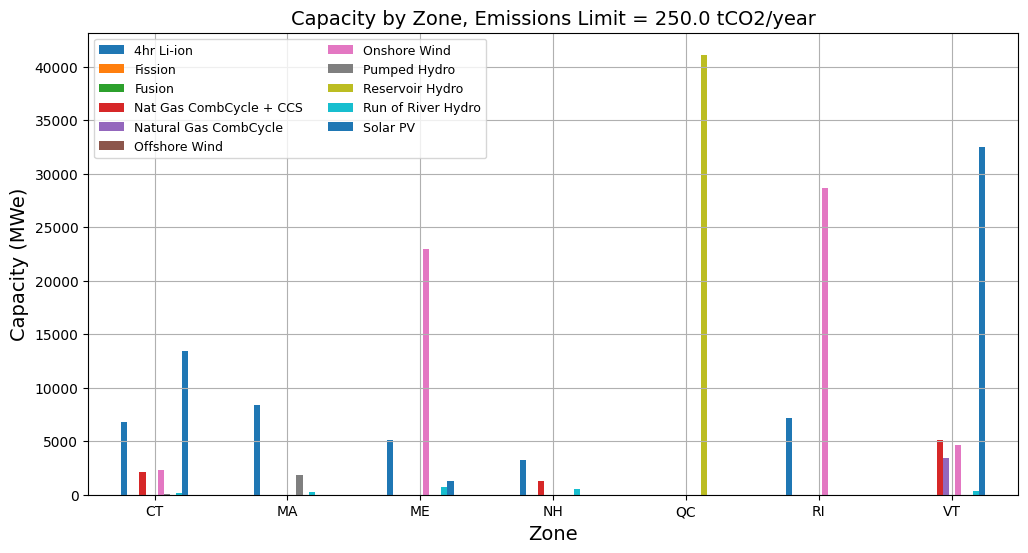

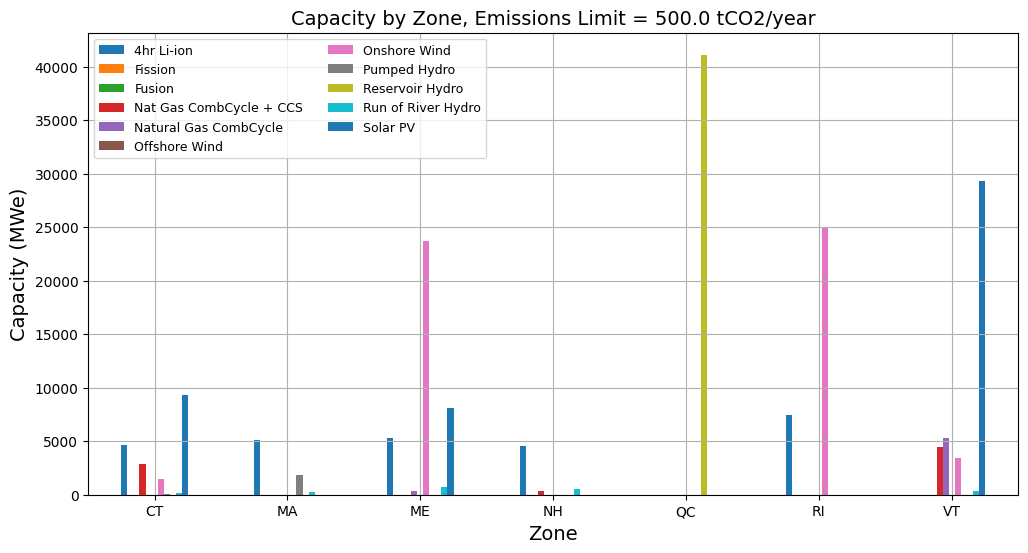

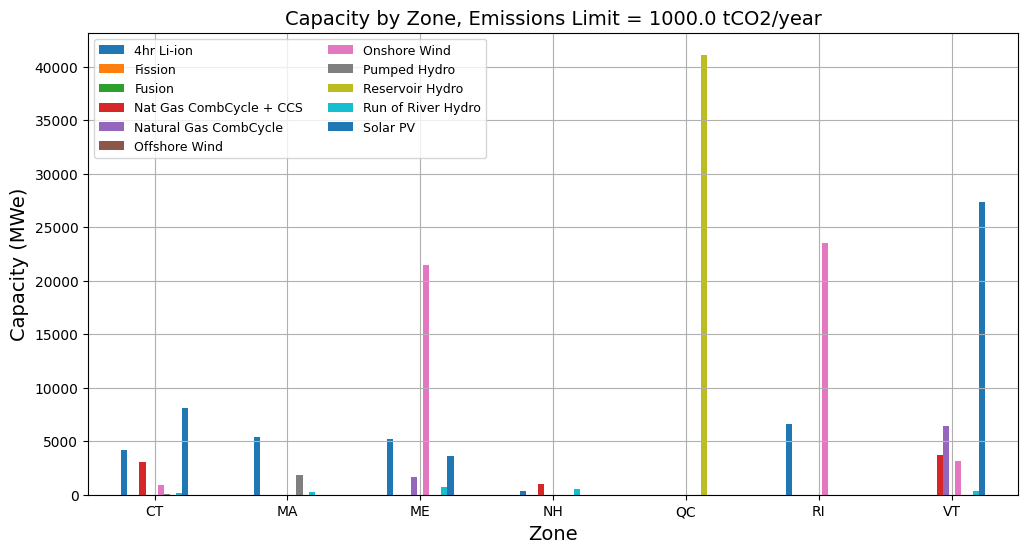

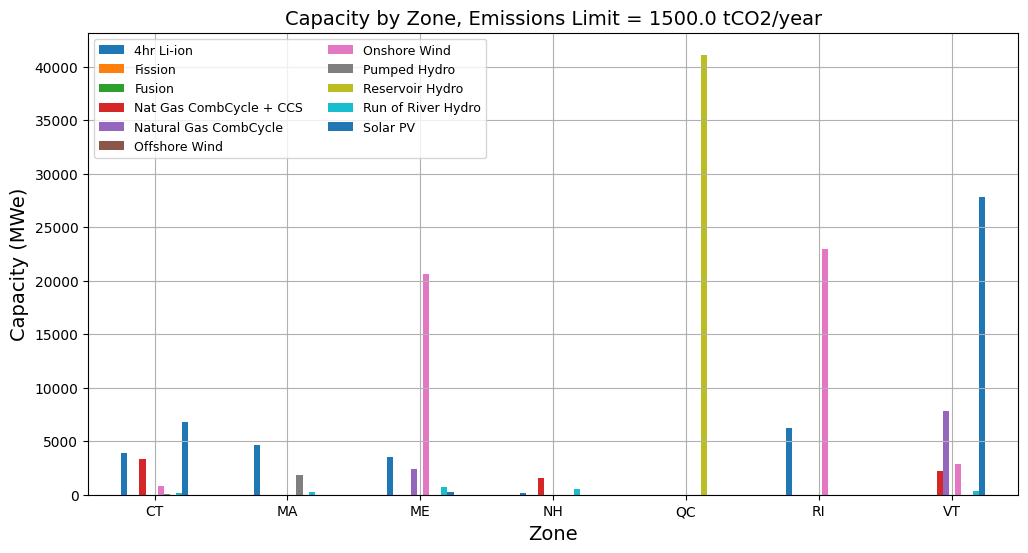

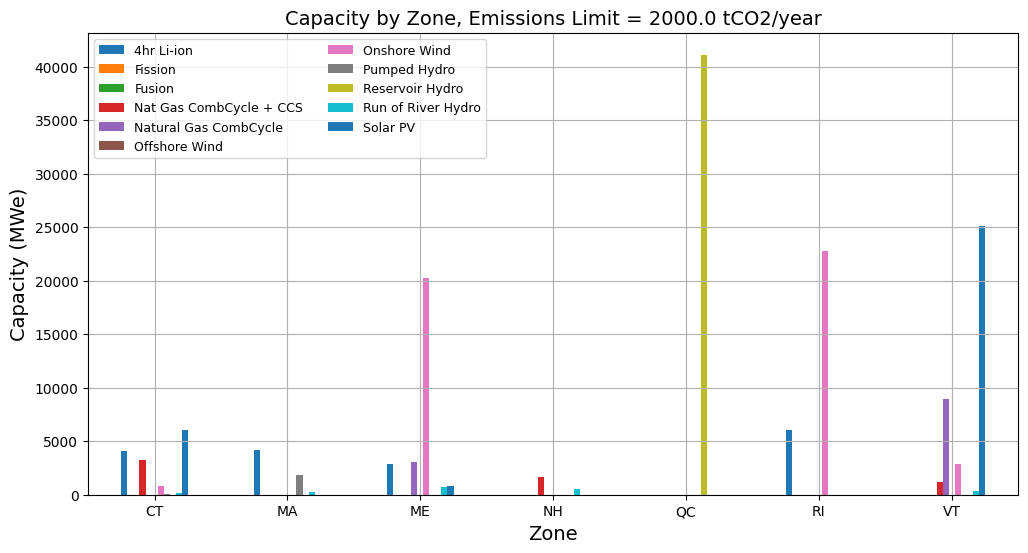

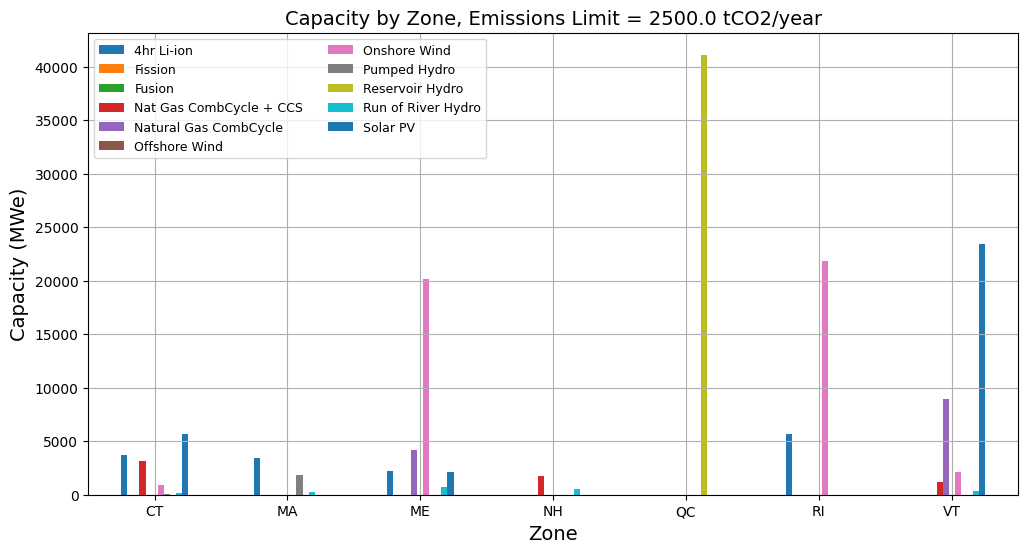

In [150]:
temp_plot_dir = plots_dir.joinpath("capacity_by_zone")
Path.mkdir(temp_plot_dir, exist_ok=True)

for emiss_lim in emiss_lim_list:
    df_capacity_by_zone =  result_df[emiss_lim]['capacity_by_zone']

    fig, ax = plt.subplots(figsize=(12, 6))
    df_capacity_by_zone.plot.bar(ax=ax, rot=0)
    ax.set_ylabel('Capacity (MWe)', fontsize=14)
    ax.set_xlabel('Zone', fontsize=14)
    ax.set_title(f"Capacity by Zone, Emissions Limit = {emiss_lim} tCO2/year", fontsize=14)
    ax.grid(True)
    ax.legend(ncols=2, fontsize=9)
    fig.savefig(temp_plot_dir.joinpath(f"Capacity_by_Zone_co2_{emiss_lim}.png"), dpi=300)

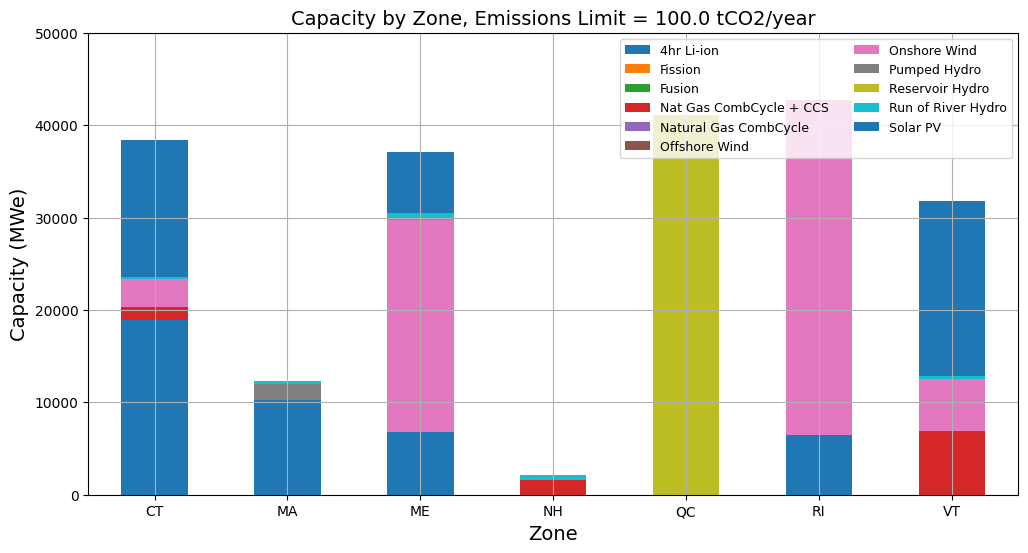

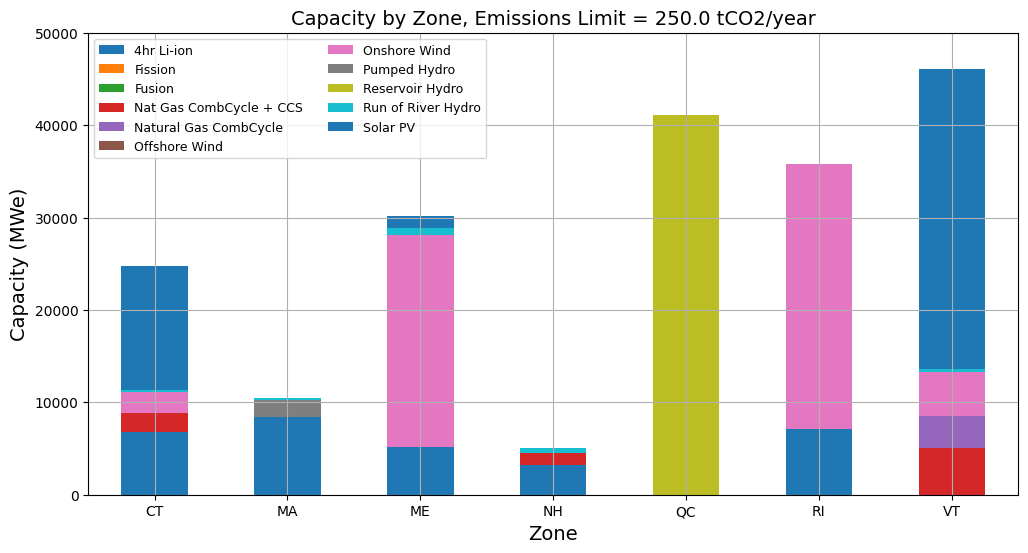

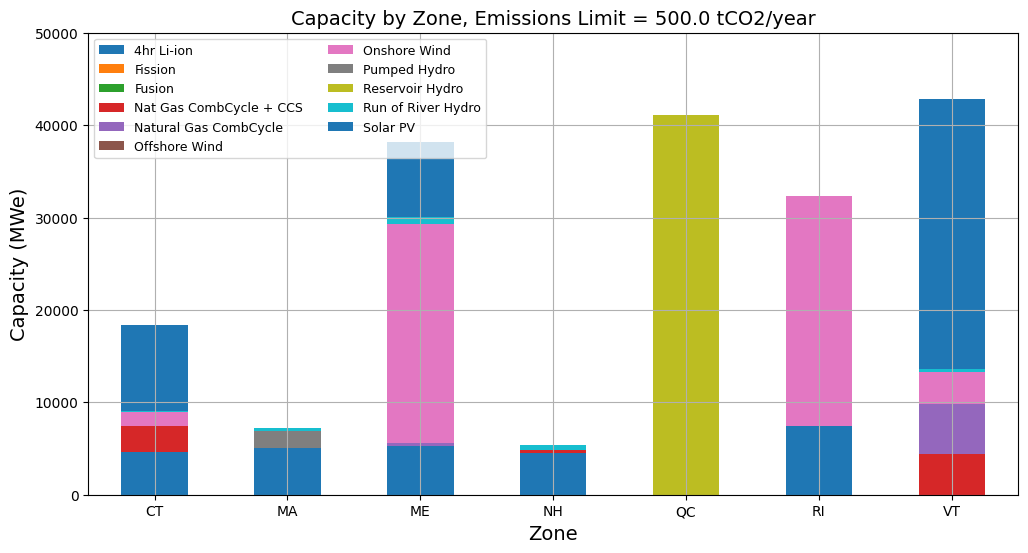

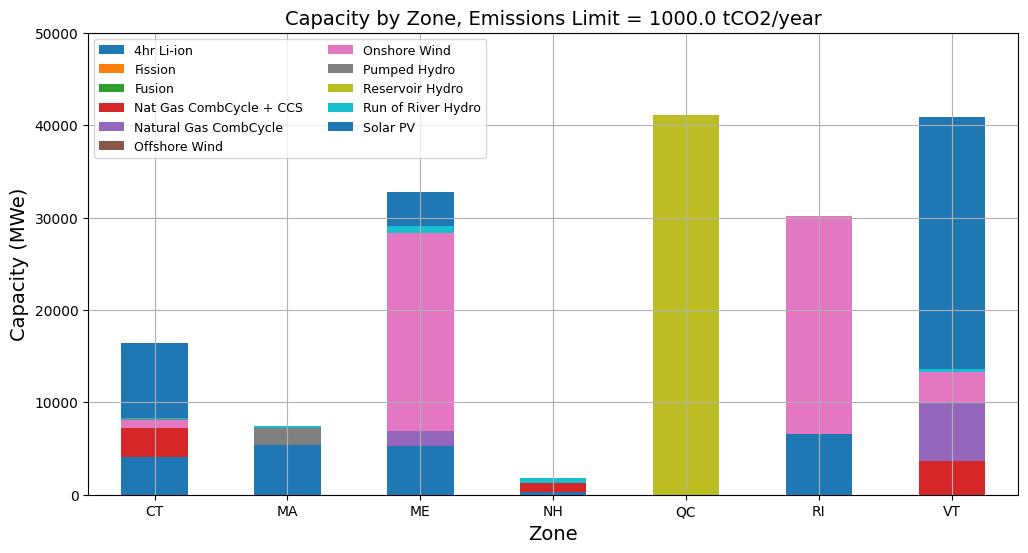

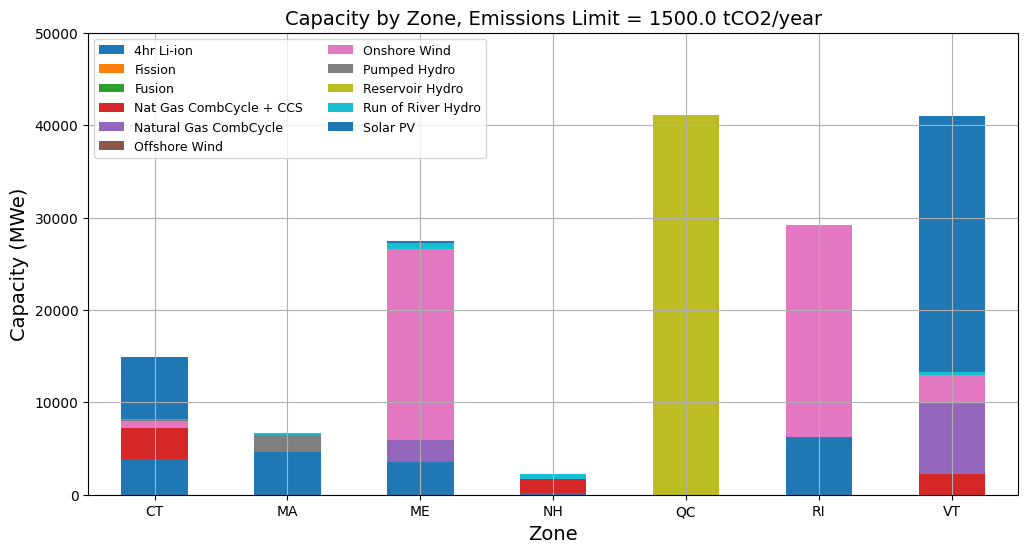

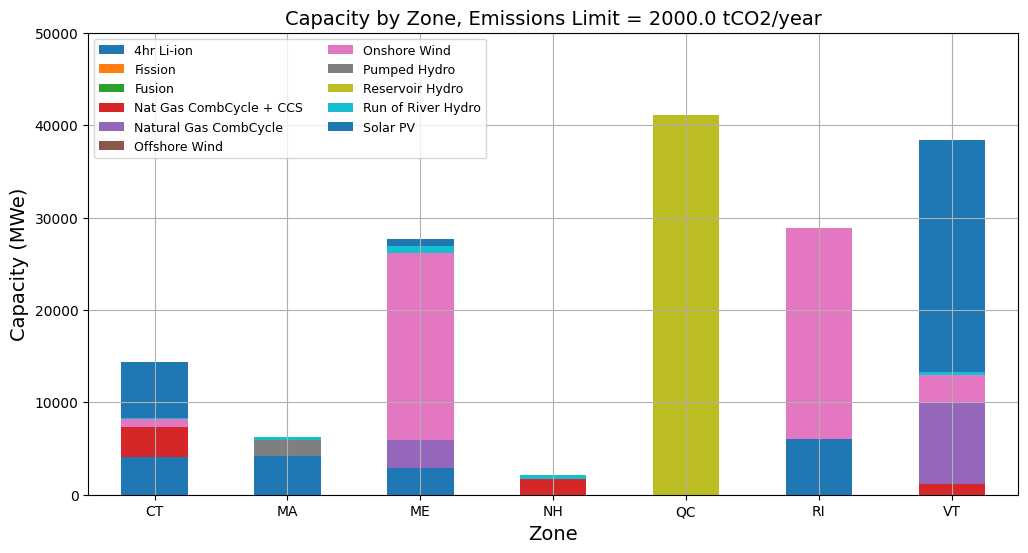

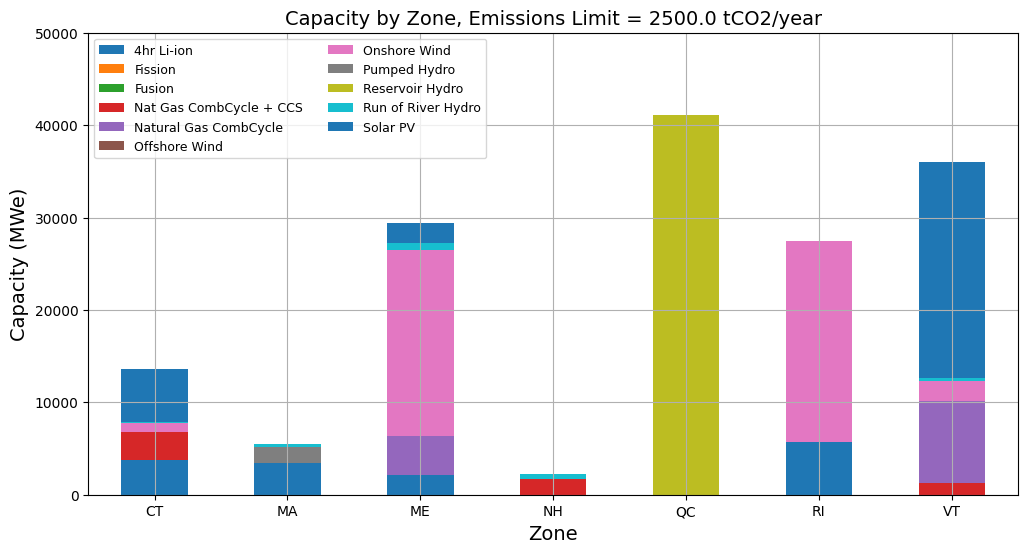

In [151]:
temp_plot_dir = plots_dir.joinpath("stacked_capacity_by_zone")
Path.mkdir(temp_plot_dir, exist_ok=True)

for emiss_lim in emiss_lim_list:
    df_capacity_by_zone =  result_df[emiss_lim]['capacity_by_zone']

    fig, ax = plt.subplots(figsize=(12, 6))
    df_capacity_by_zone.plot.bar(ax=ax, stacked=True, rot=0)
    ax.set_ylabel('Capacity (MWe)', fontsize=14)
    ax.set_xlabel('Zone', fontsize=14)
    ax.set_title(f"Capacity by Zone, Emissions Limit = {emiss_lim} tCO2/year", fontsize=14)
    ax.grid(True)
    ax.legend(ncols=2, fontsize=9)
    ax.set_ylim([0, 50000])
    fig.savefig(temp_plot_dir.joinpath(f"Stacked_Capacity_by_Zone_co2_{emiss_lim}.png"), dpi=300)